With linear regression you build a model based on current data. With this model you can predict values. In de example we did in class was the data from all the houses on Funda in Amsterdam. This data include for example price and square. The model was built on this values, the result from the model was that you can predict the price of the house based on the square. 
Linear regression is a line in a graph and this line is based on a formula: 
Y = b0 + b1 X+e
In this formula is Y the dependend value and X the independant value, the independant value influence the dependend. To stay with the example of Funda, the sqare has influence on the price, more square a higher price. A higher price doesn't lead to a bigger house. b0 is the place where the line cross the Y axis, this is the price of a house without any square meters. b1 is the slope of the line how much will the line rise by each step on the x axis. e is the error whitch valueas we can't explain. Python draw a line with the less possible squared errors. 


In [1]:
#Importing liberies
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt 
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Import the dataset and print the first 10 rows
df = pd.read_csv('data_mashable.csv')
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


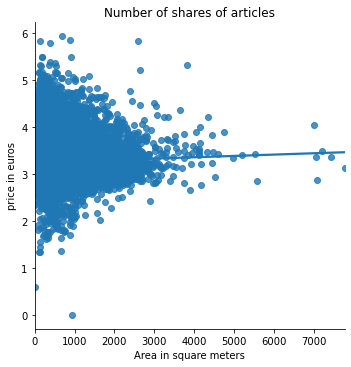

In [3]:
sns.lmplot(x='n_tokens_content', y='shares_log', data=df, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Number of shares of articles')
plt.xlabel('Area in square meters')
plt.ylabel('price in euros')
plt.show()

In [5]:
y = df['shares_log'] #We need to take out the rating as our Y-variable
x = df.loc[:,'n_tokens_title':'title_sentiment_polarity'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
x.index = df['url'] #this stores the movie names in the column names, so we don't lose track of them later
x.head()


,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,10,821,12,0,4.518879,0,0,0,0,1,...,0,0,0,0,0,0,0.439379,0.082486,0.666667,0.375
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,9,489,6,0,5.040900,0,0,0,0,0,...,0,0,0,0,0,0,0.300454,0.027715,0.000000,0.000
http://mashable.com/2013/02/01/hello-kitty-rocket/,11,131,0,1,4.877863,0,0,0,0,0,...,0,0,1,0,0,0,0.575486,0.259120,0.000000,0.000
http://mashable.com/2014/02/06/add-us-on-snapchat/,8,556,2,0,4.974820,0,0,1,0,0,...,0,1,0,0,0,0,0.327220,0.134424,0.000000,0.000
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,9,880,18,0,4.928409,0,0,0,0,1,...,0,0,0,0,0,0,0.507709,0.109256,0.000000,0.000


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data



,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,7,141,0,1,4.560284,0,0,0,0,0,...,0,0,0,0,1,1,0.451711,0.230736,0.500000,0.136364
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,9,392,9,0,4.732143,0,0,0,0,0,...,0,1,0,0,0,0,0.476976,0.078816,0.100000,0.100000
http://mashable.com/2013/03/08/facebook-acquires-storylane/,9,622,1,0,4.710611,0,0,1,0,0,...,0,0,1,0,0,0,0.488495,0.263511,0.000000,0.000000
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,12,251,23,1,4.669323,0,0,0,0,0,...,1,0,0,0,0,0,0.545746,0.052758,0.454545,0.136364
http://mashable.com/2013/08/28/chef-knife-moves-video/,8,940,13,2,4.511702,0,0,0,0,0,...,1,0,0,0,0,0,0.507042,0.063513,0.750000,0.000000


In [7]:
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = 3.338 + 0.002X


In [8]:
df['shares_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df['resid'] = df['shares_log'] - df['shares_p'] #get the residuals by subtracting the prediction from the actual views
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log,shares_p,resid
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219,3.311058,0.011161
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751,3.086889,-0.649138
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091,3.364925,-0.188834
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030,3.144492,0.156538
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151,3.299219,0.478932
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181,3.088104,-0.008923
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068,3.410600,0.133468
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091,3.343366,-0.167275
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362,3.252162,0.239199
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163,3.314679,1.121484


In [9]:
#selecting 5 variables
X_train = X_train[["n_tokens_title","n_tokens_content","num_imgs","num_videos","global_subjectivity"]]
X_train.head()



,n_tokens_title,n_tokens_content,num_imgs,num_videos,global_subjectivity
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,7,141,0,1,0.451711
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,9,392,9,0,0.476976
http://mashable.com/2013/03/08/facebook-acquires-storylane/,9,622,1,0,0.488495
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,12,251,23,1,0.545746
http://mashable.com/2013/08/28/chef-knife-moves-video/,8,940,13,2,0.507042


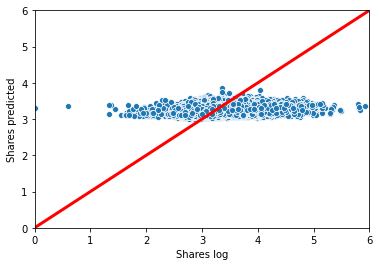

In [12]:
sns.scatterplot(x='shares_log',y='shares_p',data=df)
plt.xlim(0, 6) 
plt.ylim(0, 6) 
plt.plot([0, 6], [0, 6], color='red', lw=3) 
plt.xlabel('Shares log')
plt.ylabel('Shares predicted')
plt.show()

Evaluating the model on the test data

In [13]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.07050865854471278

This means that the model predict 7% of the cases right this is not good

In [14]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.39145558018549875

This means that we are 0.39 off in our predicted rating

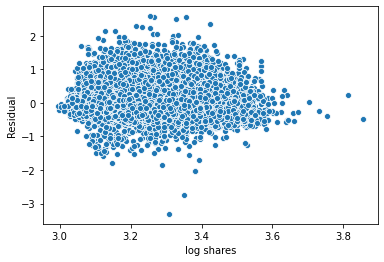

In [18]:
sns.scatterplot(x='shares_p',y='resid',data=df)
plt.xlabel('log shares')
plt.ylabel('Residual')
plt.show()